In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

<h2>Falso color</h2>
A partir de 3 imágenes monobanda recibidas como entrada, la función las visualizará en pantalla como una combinación en color (cada una de ellas se considera como uno de los colores primarios RGB). Compruebe los resultados sobre las imágenes LandSat C.</p>

In [2]:
def falso(band1, band2, band3):
    img3=cv2.merge((band1,band2,band2))     #fusiona las tres bandas, da como resultado una imagen en color
    return img3

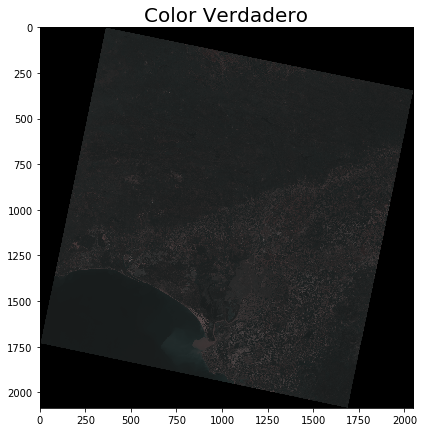

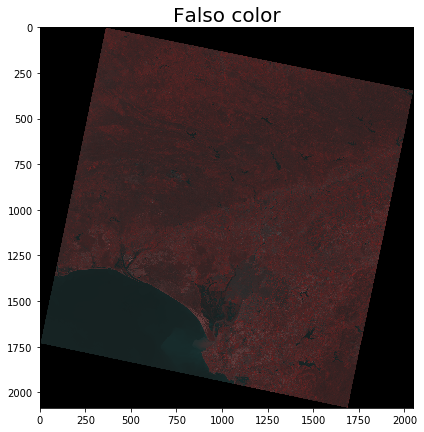

In [3]:
img_b=cv2.imread('../imgpack/Landsat C/Landsat_C_02-11_B.png',cv2.IMREAD_GRAYSCALE)
img_g=cv2.imread('../imgpack/Landsat C/Landsat_C_03-11_G.png',cv2.IMREAD_GRAYSCALE)
img_r=cv2.imread('../imgpack/Landsat C/Landsat_C_04-11_R.png',cv2.IMREAD_GRAYSCALE)
img_nir=cv2.imread('../imgpack/Landsat C/Landsat_C_05-11_NIR.png',cv2.IMREAD_GRAYSCALE)

color_verdadero=falso(img_r, img_g, img_b)
falso_color=falso(img_nir, img_b, img_g)

plt.figure(1, figsize=(7,7))
plt.imshow(color_verdadero)
plt.title("Color Verdadero", fontsize=20)

plt.figure(2, figsize=(7,7))
plt.imshow(falso_color)
plt.title("Falso color", fontsize=20)

plt.show()

In [4]:
#Guardo las imágenes:
cv2.imwrite("modificadas/Ej1_Color_verdadero.png", cv2.cvtColor(color_verdadero, cv2.COLOR_BGR2RGB))
cv2.imwrite("modificadas/Ej1_Falso_color.png", cv2.cvtColor(falso_color, cv2.COLOR_BGR2RGB))

True

In [5]:
def corte(img, porc):
    resimg=img.copy()
    #Histograma de la imagen:
    h={x:0 for x in range(0,256)}
    for x in img:
        for y in x:
            h[y]=h[y]+1
    l_valores=list(h.values())  
    num_pixeles=img.size
    porct=(num_pixeles*porc)
    
    #Obtención de los cortes mínimo y máximo
    cmin=0
    cmax=255
    v=0
    for x in range(1,256):
        v+=l_valores[x]
        if v>porct:
            cmin=x
            break
    v=0
    for x in range(255,0,-1):  #recorrido hacia atrás para encontrar el máximo
        v+=l_valores[x]
        if v>porct:
            cmax=x
            break

    #Se aplica el corte de colas:
    for x in range(resimg.shape[0]):         
        for y in range(resimg.shape[1]):     
            if resimg[x][y]<=cmin:    #todos los valores menores que cmin se ponen a 0 
                resimg[x][y]=0               
            elif resimg[x][y]>=cmax:  #todos los valores mayores o iguales que cmax se ponen a 255       
                resimg[x][y]=255             
            else:                            
                resimg[x][y]=0+((resimg[x][y]-cmin)/(cmax-cmin))*(255-0)
    
    return resimg

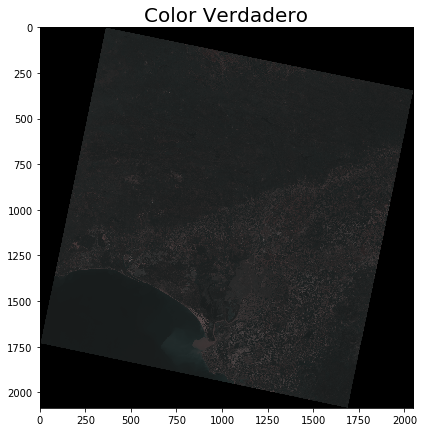

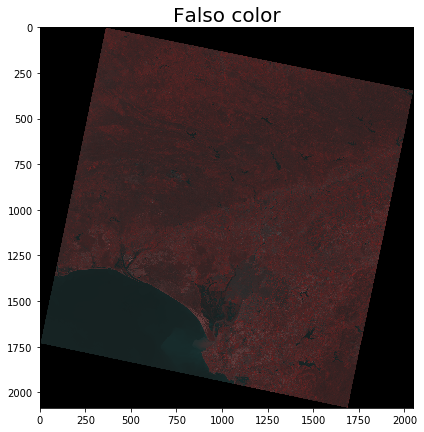

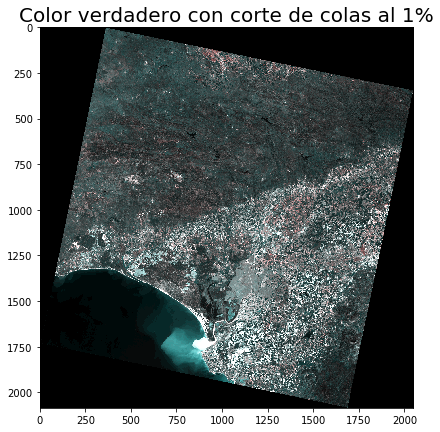

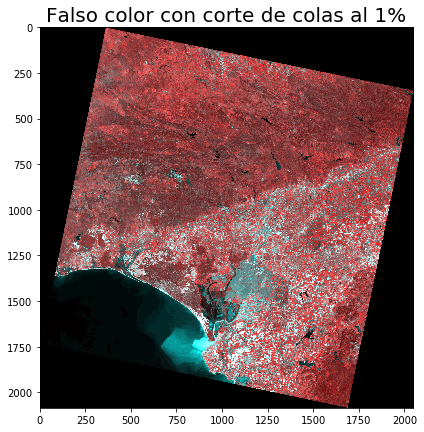

In [6]:
img_bc=corte(img_b, 0.01)
img_gc=corte(img_g, 0.01)
img_rc=corte(img_r, 0.01)
img_nirc=corte(img_nir, 0.01)

color_verdadero_corte=falso(img_rc, img_gc, img_bc)
falso_color_corte=falso(img_nirc, img_gc, img_bc)

plt.figure(1, figsize=(7,7))
plt.imshow(color_verdadero)
plt.title("Color Verdadero", fontsize=20)

plt.figure(2, figsize=(7,7))
plt.imshow(falso_color)
plt.title("Falso color", fontsize=20)

plt.figure(3, figsize=(7,7))
plt.imshow(color_verdadero_corte)
plt.title("Color verdadero con corte de colas al 1%", fontsize=20)

plt.figure(4, figsize=(7,7))
plt.imshow(falso_color_corte)
plt.title("Falso color con corte de colas al 1%", fontsize=20)

plt.show()

In [7]:
cv2.imwrite("modificadas/Ej1_Color_verdadero_Corte_1.png", cv2.cvtColor(color_verdadero_corte, cv2.COLOR_BGR2RGB))
cv2.imwrite("modificadas/Ej1_Falso_color_Corte_1.png", cv2.cvtColor(falso_color_corte, cv2.COLOR_BGR2RGB))

True